In [255]:
# Sentiment analysis of Amazon reviews
import pandas as pd
import numpy as np
import spacy
from textblob import TextBlob

data = pd.read_csv('amazon_product_reviews.csv')

In [256]:
nlp = spacy.load('en_core_web_sm')

In [257]:
reviews_data = pd.DataFrame(data['reviews.text'])
reviews_data.dropna(inplace=True)
reviews_data.columns = ["Sentence"] 
reviews_data["Cumulative Polarity"] = None
reviews_data.head()


,Sentence,Cumulative Polarity
0,I thought it would be as big as small paper bu...,None
1,This kindle is light and easy to use especiall...,None
2,Didnt know how much i'd use a kindle so went f...,None
3,I am 100 happy with my purchase. I caught it o...,None
4,Solid entry level Kindle. Great for kids. Gift...,None


In [258]:
def cumulative_polarity(sentence: str) -> float:
    """
    Compute cumulative polarity for all words in a sentence.
    """
    # Argument validation
    if isinstance (sentence, str) is False:
        raise TypeError("The argument `sentence` must be of type string.")
    # Compute the polarity of every word in a sentence and add up all polarities
    cumulative_polarity = 0.0
    words = sentence.lower().split()
    for word in words:
        if word in nlp.Defaults.stop_words:
            continue
        blob = TextBlob(word)
        cumulative_polarity += blob.sentiment.polarity
    return cumulative_polarity



def main(df: pd.DataFrame) -> None: 
    # Arguments validation
    if isinstance(df,pd.DataFrame) is False:
        raise TypeError("The argument df must be of pandas.DataFrame type.")
    # Compute polarity for every sentence
    for i in range(len(df)):
        sentence = df.iloc[i, 0]
        df.iloc[i, 1] = cumulative_polarity(sentence)

        

In [261]:
#sample = reviews_data.head()
main(df=reviews_data)

In [267]:
polarity_score = reviews_data['Cumulative Polarity'].mean()
if polarity_score > 0:
    sentiment = 'positive'
elif polarity_score < 0:
    sentiment = 'negative'
else:
    sentiment = 'neutral'

print(f"Reviews' Mean polarity score: {polarity_score}\nSentiment: {sentiment}")


Reviews' Polarity score: 1.0928375970279833
Sentiment: positive


In [268]:
stdev = reviews_data['Cumulative Polarity'].std()
print(f" Standard deviation of the polarity is {stdev}.")

 Standard deviation of the polarity is 1.0253841916109658.


In [271]:
# Sample polarity by sentence
sample = reviews_data.head()
main(df=reviews_data)
print (sample)

                                            Sentence Cumulative Polarity
0  I thought it would be as big as small paper bu...                -0.1
1  This kindle is light and easy to use especiall...            0.833333
2  Didnt know how much i'd use a kindle so went f...              0.4625
3  I am 100 happy with my purchase. I caught it o...               4.125
4  Solid entry level Kindle. Great for kids. Gift...                3.25


In [272]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict

In [273]:
# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
negative_words = defaultdict(int)

In [274]:

def words_sent(df: pd.DataFrame) -> None:
    if isinstance(df,pd.DataFrame) is False:
        raise TypeError
    for i in range(len(df)):
        sentence = df.iloc[i,0]
        
           # for words in sentences:
        words = sentence.split()

        for word in words:
            blob = TextBlob(word)
            polarity = blob.sentiment.polarity

            if polarity > 0:
                positive_words[word.lower()] += 1
            elif polarity < 0:
                negative_words[word.lower()] += 1

In [275]:
words_sent(reviews_data)
pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)

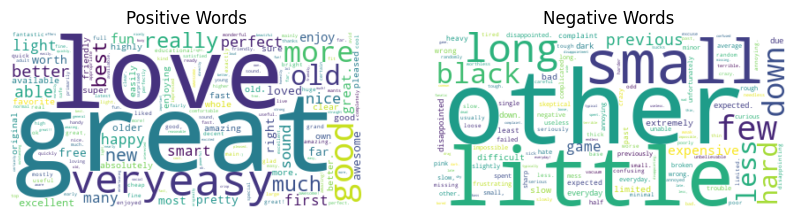

In [276]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

plt.show()